## Problem Statement:
1. A credit card is a small thin plastic or fiber card that incorporates
information about the person such as a picture or signature and the
person’s name on it to charge purchases and services to his linked
account. Charges are debited regularly. Nowadays, card data is read by
ATMs, swiping machines, store readers, banks and online transactions.
2. Each card has a unique card number which is very important. Its security
mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions
which has led to substantial growth in scam cases.
3. Credit card fraud is expanding heavily because fraud financial loss is
increasing drastically. Multiple data mining and statistical techniques are
used to catch fraud. Therefore the detection of fraud using efficient and
secured methods are very important.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("creditcard.csv", skipinitialspace = True)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.0,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.0,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.0,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.0,0.0
11664,19915,1.504229,-0.499337,0.052377,-0.576345,-0.393971,0.015149,-0.718603,-0.125852,1.023281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(11665, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,11665.000000,...,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000,11664.000000
mean,7701.086069,-0.219601,0.274988,0.897990,0.281016,-0.078995,0.140055,-0.111620,-0.051877,0.893589,...,-0.061180,-0.155205,-0.034310,0.017421,0.101538,0.070630,0.007481,0.000804,62.795132,0.004201
std,5964.969525,1.561122,1.305785,1.272504,1.467970,1.184333,1.305472,1.129256,1.236992,1.182130,...,0.902556,0.624275,0.508488,0.592137,0.429725,0.560307,0.406841,0.262342,179.816783,0.064681
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2463.000000,-0.987193,-0.257287,0.416175,-0.615559,-0.680719,-0.622413,-0.583742,-0.186419,0.181510,...,-0.268948,-0.545531,-0.172765,-0.332771,-0.146729,-0.346888,-0.080638,-0.015513,5.000000,0.000000
50%,6308.000000,-0.347783,0.262619,0.950034,0.215393,-0.179654,-0.147786,-0.088491,0.011665,0.880826,...,-0.130094,-0.129191,-0.044523,0.073145,0.139638,0.009023,-0.003818,0.015397,15.950000,0.000000
75%,11898.000000,1.159319,0.888750,1.616224,1.153380,0.348187,0.508886,0.439387,0.267067,1.570361,...,0.023295,0.235448,0.076761,0.402522,0.374859,0.417677,0.108443,0.073961,50.000000,0.000000
max,19915.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [8]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.056543,-0.016582,0.017920,0.092991,-0.076262,-0.010338,-0.143468,0.011014,0.428655,...,-0.031692,0.002587,0.003644,-0.023751,0.052160,0.078801,-0.037687,-0.015772,-0.017941,0.036345
V1,0.056543,1.000000,-0.157864,-0.008264,0.005306,-0.152342,0.035731,0.033428,0.198790,-0.058335,...,-0.118939,-0.024616,-0.085160,-0.011504,0.250103,0.012080,-0.109678,0.072922,-0.185156,-0.118379
V2,-0.016582,-0.157864,1.000000,-0.172077,0.099891,-0.070430,0.010383,0.066345,-0.157023,-0.110103,...,0.143520,-0.124437,0.043853,-0.031372,-0.159772,-0.054228,0.038840,-0.025315,-0.444916,0.185733
V3,0.017920,-0.008264,-0.172077,1.000000,-0.073672,0.025701,-0.106046,0.279739,-0.035140,0.209214,...,-0.024163,0.236130,0.005660,0.025486,-0.152694,0.037753,-0.153106,-0.057497,-0.150082,-0.420336
V4,0.092991,0.005306,0.099891,-0.073672,1.000000,-0.108558,-0.000170,-0.142571,0.045729,-0.194074,...,-0.014309,-0.000842,-0.013838,-0.050024,-0.064686,0.055587,0.023071,0.009171,0.121732,0.255711
V5,-0.076262,-0.152342,-0.070430,0.025701,-0.108558,1.000000,0.134661,-0.055061,0.074116,-0.042945,...,-0.044885,-0.117327,-0.041422,0.018675,-0.022608,-0.105957,-0.014589,-0.115975,-0.382393,-0.102717
V6,-0.010338,0.035731,0.010383,-0.106046,-0.000170,0.134661,1.000000,-0.004109,-0.010418,0.004540,...,0.071621,-0.059612,0.021147,0.025976,0.079657,-0.037069,-0.068796,-0.011026,0.220215,-0.104988
V7,-0.143468,0.033428,0.066345,0.279739,-0.142571,-0.055061,-0.004109,1.000000,0.121374,0.016294,...,-0.144194,0.061378,0.070469,0.008311,-0.063573,-0.085775,-0.156030,-0.049434,0.293652,-0.286924
V8,0.011014,0.198790,-0.157023,-0.035140,0.045729,0.074116,-0.010418,0.121374,1.000000,-0.088749,...,-0.342263,0.170301,-0.069828,0.017761,0.012704,0.021227,0.047988,0.082024,-0.066965,0.054047
V9,0.428655,-0.058335,-0.110103,0.209214,-0.194074,-0.042945,0.004540,0.016294,-0.088749,1.000000,...,-0.006213,0.029232,0.006941,0.008089,0.154589,0.086859,-0.066839,-0.086297,-0.010328,-0.186959


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
# As there are very less number of null values, dropping the null values:
df = df.dropna()
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.duplicated().sum()

44

In [12]:
# Dropping duplicated values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
df.shape

(11620, 31)

In [14]:
df.Class.unique()

array([0., 1.])

Fraud Transactions:  49
Non Fraud:  11571
Percentage of fraud transactions:  0.42168674698795183


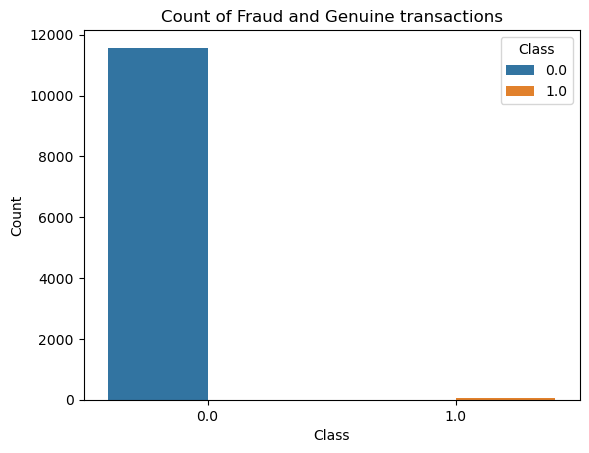

In [15]:
non_fraud = len(df[df['Class'] == 0])
fraud = len(df[df['Class'] == 1])
percent_fraud = (fraud / (fraud + non_fraud)) * 100
print("Fraud Transactions: ", fraud)
print("Non Fraud: ", non_fraud)
print("Percentage of fraud transactions: ", percent_fraud)
sns.countplot(x = df['Class'], hue = df['Class'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of Fraud and Genuine transactions")
plt.show()

In [16]:
#Dropping Time Column
df = df.drop(columns = ['Time'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [17]:
# Normalizing Amount column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['NormalizedAmount'] = sc.fit_transform(df[['Amount']])
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.481127
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.334618
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.752740
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.336110
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.039027
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0,-0.329177
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0,-0.321849
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0,-0.123034
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0,0.167887
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0,-0.329122


In [18]:
# Dropping Amount column
df = df.drop(columns = ['Amount'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.481127
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.334618
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.752740
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.336110
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.039027


In [19]:
df[df['Class'] == 1.0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1.0,-0.349553
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.0,2.587417
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1.0,0.982521
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1.0,-0.021989
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,-0.344001
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.0,-0.344001
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.0,-0.344001
6336,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.0,-0.344001
6338,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.0,-0.344001
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.0,-0.344001


In [20]:
# Creating Training and Testing set
x = df.drop(columns = ['Class'])
y = df[['Class']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [21]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [22]:
len(y_test[y_test['Class'] == 1.0])

13

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3473
         1.0       0.92      0.85      0.88        13

    accuracy                           1.00      3486
   macro avg       0.96      0.92      0.94      3486
weighted avg       1.00      1.00      1.00      3486

Confusion Matrix: 
 [[3472    1]
 [   2   11]]
Accuracy Score: 0.9991394148020654


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3473
         1.0       0.83      0.77      0.80        13

    accuracy                           1.00      3486
   macro avg       0.92      0.88      0.90      3486
weighted avg       1.00      1.00      1.00      3486

Confusion Matrix: 
 [[3471    2]
 [   3   10]]
Accuracy Score: 0.9985656913367756


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 1000)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3473
         1.0       1.00      0.85      0.92        13

    accuracy                           1.00      3486
   macro avg       1.00      0.92      0.96      3486
weighted avg       1.00      1.00      1.00      3486

Confusion Matrix: 
 [[3473    0]
 [   2   11]]
Accuracy Score: 0.9994262765347103


### Observation and result:
Below are the observations from above models:

Logistic Regression:
* Accuracy Score: 0.9991394148020654
* Confusion Matrix: 
 [[3472    1]
 [   2   11]] 
 
Decision Tree:
* Accuracy Score: 0.9985656913367756
* Confusion Matrix: 
 [[3471    2]
 [   3    8]]
 
Random Forest:
* Accuracy Score: 0.9994262765347103
* Confusion Matrix: 
 [[3473    0]
 [   2   11]]
 
##### By looking at the confusion matrix and Accuracy score of various models, we can conclude that Random Forest model is providing slightly better accuracy compared to Logistic Regression and Decision Tree model. 